# Submission 1: Data Preparation and Analysis

In [1]:
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import statsmodels.tsa.stattools as ts
import datetime
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import jarque_bera

yf.pdr_override()

/Users/kyle.nguyen/miniconda3/envs/quant/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AR, AutoReg
from statsmodels.tsa.arima_model import ARIMA
import numpy as np

In [3]:
TRAIN_TEST_RATIO = 0.2

In [4]:
covid_pharma_tickers = ['PFE', 'MRNA', 'JNJ', 'AZN', 'NVAX']
start = '2020-03-01'
end = datetime.datetime.now().date().strftime('%Y-%m-%d')
print(f"Period: {start} to {end}")

Period: 2020-03-01 to 2020-08-15


In [5]:
prices = pdr.get_data_yahoo(covid_pharma_tickers, start=start, end=end)['Adj Close']
prices.tail()

Symbols,PFE,MRNA,JNJ,AZN,NVAX
Date,,,,,
2020-08-10,38.389999,72.010002,148.029999,54.940784,178.509995
2020-08-11,37.790001,68.970001,146.970001,54.742371,149.479996
2020-08-12,38.330002,69.519997,149.660004,56.290001,124.419998
2020-08-13,38.169998,67.830002,148.000000,55.799999,133.279999
2020-08-14,38.060001,69.150002,148.240005,55.189999,146.509995


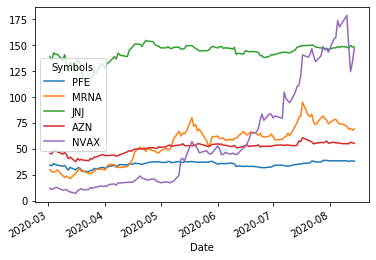

In [6]:
prices.plot()

#### NVAX looks intersting, let's analyse futher.

NVAX


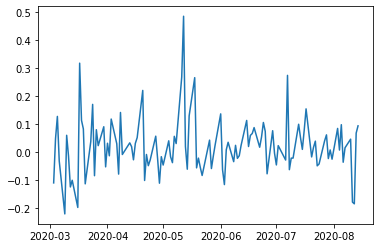

In [7]:
data = prices['NVAX']
print(data.name)
ret = np.log(data).diff().dropna()
plt.plot(ret)

### Calculate mean and standard deviation

In [8]:
mean_return = ret.mean()
std_return = ret.std()
basic_stats = pd.DataFrame([mean_return, std_return], columns = [data.name], index = ['Mean return', 'Volatility'])
basic_stats

,NVAX
Mean return,0.021556
Volatility,0.101325


### Implement Technical indicators
Let's use MA model first

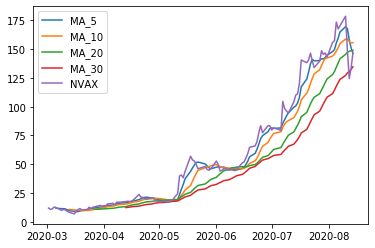

In [9]:
mas = []
for i in [5, 10, 20, 30]:
    ma = data.rolling(i).mean()
    mas.append(ma)
    plt.plot(ma, label=f'MA_{i}')
plt.plot(data, label='NVAX')
plt.legend()
plt.show()

#### Preparing test and train data

In [10]:
train, test = train_test_split(data, test_size=TRAIN_TEST_RATIO, shuffle=False)
start_train = train.index[0].to_pydatetime()
end_train = train.index[-1].to_pydatetime()
start_test = test.index[0].to_pydatetime()
end_test = test.index[-1].to_pydatetime()
print(f"Fitting model from {start_train} to {end_train}")
print(f"Predicting from {start_test} to {end_test}")

Fitting model from 2020-03-02 00:00:00 to 2020-07-13 00:00:00
Predicting from 2020-07-14 00:00:00 to 2020-08-14 00:00:00


### Identify structural breaks - TODO

In [11]:
#TODO

### Apply Bera-Jarque test for returns

In [12]:
jb, pvalue, skew, kurtosis = jarque_bera(ret)
jb_test= pd.DataFrame([jb, pvalue, skew, kurtosis], index=['Jarque-Bera test statistic', 'p-value', 'Skewness', 'Kurtosis'])
jb_test

,0
Jarque-Bera test statistic,9.147174e+01
p-value,1.371397e-20
Skewness,1.096023e+00
Kurtosis,6.757676e+00


In [13]:
if pvalue < 0.05:
    print("Return is likely not normal")
else:
    print("Return is likely normal")

Return is likely not normal


### Apply a cointegration test - TODO

In [14]:
#TODO

### Forcast next period using AR(1) model

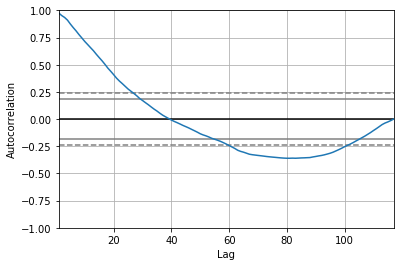

In [15]:
autocorrelation_plot(data)

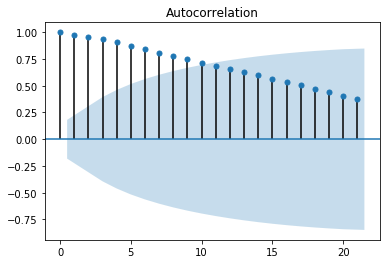

In [16]:
_ = plot_acf(data)

In [17]:
def predict(m_fit, start, end, **kwargs):
    # make predictions
    predictions = m_fit.predict(start=start, end=end, **kwargs)
    for i in range(len(predictions)):
        print(f'predicted={predictions.values[i]}, expected={test.values[i]}')
    rmse = np.sqrt(mean_squared_error(test, predictions))
    print(f'Test RMSE: {rmse}')
    # plot result
    plt.plot(test.values)
    plt.plot(predictions.values, color='red')
    plt.show()

#### Although AR model from statsmodels suggest the best lag parameter to be 12, let's try with AR(1) model first

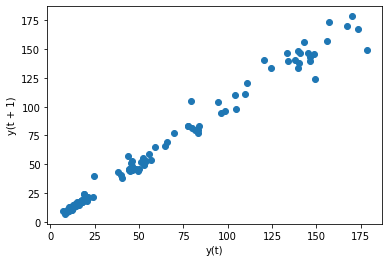

In [18]:
lag_plot(data)

#### We can observe a strong correlation between prices of 2 consecutive days


predicted=106.63796872773673, expected=109.97000122070312
predicted=109.0003888808668, expected=111.1500015258789
predicted=111.4081125823791, expected=120.29000091552734
predicted=113.86200860724298, expected=140.49000549316406
predicted=116.36296239071095, expected=138.22999572753906
predicted=118.91187634780891, expected=140.69000244140625
predicted=121.50967019895307, expected=146.4499969482422
predicted=124.15728130181112, expected=139.58999633789062
predicted=126.85566498952747, expected=133.92999267578125
predicted=129.60579491543447, expected=139.60000610351562
predicted=132.4086634043743, expected=148.60000610351562
predicted=135.2652818107577, expected=145.36000061035156
predicted=138.17668088348944, expected=146.6199951171875
predicted=141.14391113789173, expected=143.10000610351562
predicted=144.1680432347599, expected=155.8699951171875
predicted=147.25016836668715, expected=157.1699981689453
predicted=150.39139865179786, expected=173.49000549316406
predicted=153.5928675350

/Users/kyle.nguyen/miniconda3/envs/quant/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/kyle.nguyen/miniconda3/envs/quant/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


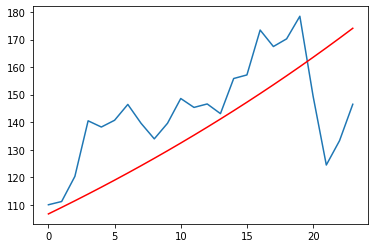

In [19]:
ar_1 = AutoReg(train, lags=1).fit()
predict(ar_1, len(train), len(train)+len(test)-1)

### Forcast next period using suggested optimal lag parameter

In [20]:
def fit_model(train, model_wrapper, test_ratio=0.1):
    # train autoregression
    m = model_wrapper(train)
    m_fit = m.fit()
    # plot residual
    residuals = pd.DataFrame(m_fit.resid)
    residuals.plot()
    residuals.plot(kind='kde')
    return m_fit

/Users/kyle.nguyen/miniconda3/envs/quant/lib/python3.6/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATIO

Lag: 12
Coefficients: const       0.186204
L1.NVAX     0.896163
L2.NVAX    -0.025571
L3.NVAX     0.054558
L4.NVAX     0.286976
L5.NVAX     0.005830
L6.NVAX    -0.461210
L7.NVAX     0.393706
L8.NVAX    -0.349614
L9.NVAX     0.203302
L10.NVAX   -0.086777
L11.NVAX   -0.056485
L12.NVAX    0.185690
dtype: float64


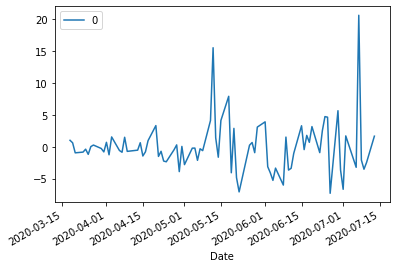

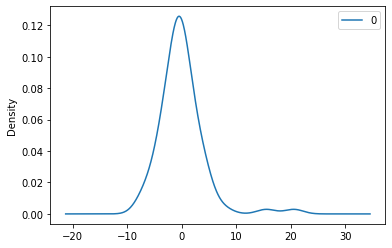

In [21]:
# usage
ar_wrapper = lambda train_data: AR(train_data)
ar_fit = fit_model(train, ar_wrapper, TRAIN_TEST_RATIO)
print(f"Lag: {ar_fit.k_ar}")
print(f"Coefficients: {ar_fit.params}")

predicted=113.80475474247496, expected=109.97000122070312
predicted=105.99082667622474, expected=111.1500015258789
predicted=114.1477882174704, expected=120.29000091552734
predicted=114.23981412343159, expected=140.49000549316406
predicted=123.27377881306947, expected=138.22999572753906
predicted=121.99902494396767, expected=140.69000244140625
predicted=121.46024015812787, expected=146.4499969482422
predicted=130.23004735891126, expected=139.58999633789062
predicted=131.6158379791084, expected=133.92999267578125
predicted=138.99396020724254, expected=139.60000610351562
predicted=135.57034598242703, expected=148.60000610351562
predicted=142.66536540715532, expected=145.36000061035156
predicted=148.06424732628815, expected=146.6199951171875
predicted=150.7654778089572, expected=143.10000610351562
predicted=155.96410051336386, expected=155.8699951171875
predicted=156.44910414243853, expected=157.1699981689453
predicted=166.0674299616891, expected=173.49000549316406
predicted=167.879659360

/Users/kyle.nguyen/miniconda3/envs/quant/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


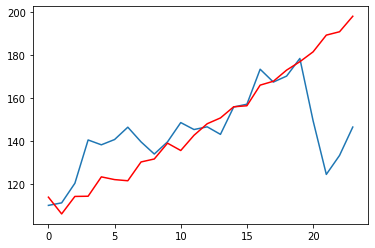

In [22]:
predict(ar_fit, len(train), len(train)+len(test)-1)